<a href="https://colab.research.google.com/github/mbalbi/ciencia_de_datos/blob/tp1/tps/trabajo_practico_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico 1: Análisis exploratorio de datos

**Objetivos:** Este trabajo tiene como objetivos que el alumno se familiarize con las funciones básicas de Python, y pueda realizar operaciones básicas de manejo, limpieza y visualización de datos.

**Librerías:** para realizar este trabajo serán necesarias las siguientes librerías.
- Numpy: matemática básica y definición de matrices y vectores
- Scipy.stats: repositorio de distribuciones de probabilidad y funciones de algebra
- Pandas: manejo de datasets
- Seaborn: visualización de datos

Si requiere usar otras no incluidas aquí, no dude en importarlas.

In [1]:
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Ejercicio 1: El tablero de Galton

El [tablero de Galton](https://en.wikipedia.org/wiki/Galton_board) (o quincunx) es un artefacto para demostrar físicamente el [Teorema Central del límite](https://en.wikipedia.org/wiki/Central_limit_theorem), que establece que la suma de muchas variables aleatorias independientes e idénticamente distribuidas tienden a una distribución Normal.

En el tablero, las bolitas van cayendo a través de una grilla de obstáculos equiespaciados. En cada sucesiva fila, la bolita que cae golpea en un obstáculo y sigue su recorrido a la izquierda o la derecha de este con igual probabilidad.

Asumiendo que la bolita arranca desde la posición horizontal central del tablero $x_0=0$, y va cayendo dando saltos discretos cada vez que se encuentra con un obstáculo, podemos calcular la posición horizontal de la bolita en el escalón $i$ según,
$$ 
x_{i+1} = x_{i} + \Delta_i,\ i=0,1,\ldots \\
\Delta =
\begin{cases}
1 & \text{con probabilidad 0.5}\\
-1 & \text{con probabilidad 0.5}
\end{cases}
$$

Se requiere crear una función para calcular la posición de la bolita desde su posición inicial, a través de N obstáculos (pasos) hacia abajo.

La función que figura abajo recibe tres argumentos: 
- p [0<float<1]: La probabilidad de la bolita de ir hacia la derecha (en nuestro tablero es 0.5)
- Npasos [int]: La cantidad de pasos que va a tener la caída (el tamaño del tablero)
- xinicial [int]: La posición inicial (preinicializada en 0)

Complete la función donde se indica, para calcular la posición para cada paso $x_i$ según la fórmula de más arriba.

In [2]:
def caminante( p, Npasos, xinicial=0 ):
    # Inicializar un vector de 0s por cada paso de la bolita hacia abajo
    x = np.zeros( Npasos ) 
    # Posición inicial
    x[0] = xinicial
    # Calcular la posición para cada paso
    for i in range( Npasos-1 ):
        # CÓDIGO DEL ALUMNO =============================
        u = np.random.random()
        x[i+1] = x[i] + ( u < p ) - ( u > p )
        # ===============================================
    return x

Realice un gráfico de 3 o 4 trayectorias de bolitas, con Npasos=30 para confirmar el correcto funcionamiento de la función 'caminante':

Text(0, 0.5, 'posicion')

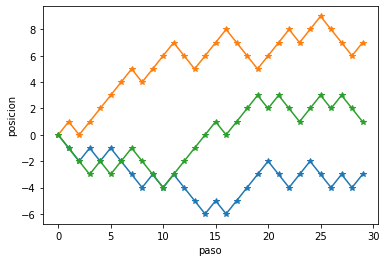

In [4]:
p = 0.5 # Probabilidad de ir a derecha
Npasos = 30 # Número de pasos de la trayectoria

# CÓDIGO DEL ALUMNO ========================
# Gráfico
fig = plt.figure()
for i in range( 3 ):
  plt.plot( caminante( p, Npasos ), marker='*' )
plt.xlabel('paso')
plt.ylabel('posicion')
# ==========================================

Luego de $N$ pasos, la posición de la bolita es el resultado de la suma de $N$ saltos $\Delta$. Luego de una buena cantidad de pasos, el TCL indica que la posición incierta de la bolita, sigue una distribución de probabilidad Normal según,
$$
x_i \sim N \left( 0, N/\sqrt{N} \right)
$$


para un número grande de trayectorias de bolitas, grafique el histograma de las posiciones de las bolitas luego de $N=30$, y compare con la distribución Normal según el TCL.

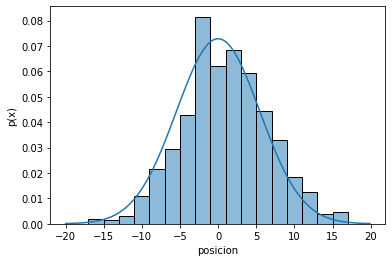

In [ ]:
Npasos = 30 # Número de pasos en cada trayectoria
Nbolas = 1000 # Número de trayectorias a graficar
x = np.zeros( [Nbolas, Npasos]) # Posición de la bola i, en el paso j

# CÓDIGO DEL ALUMNO ==========================================
for i in range( Nbolas ):
    x[i] = caminante( 0.5, Npasos )

# Plot histogram
fig = plt.figure()
xplot = np.arange(-20,20,0.1)
s = np.sqrt(p*(1-p))
plt.plot( xplot, st.norm.pdf(xplot,0,Npasos/np.sqrt(Npasos)) );
sns.histplot( x[:,-1], fill=True, alpha=0.5, stat='density',
              binwidth=2 )
plt.xlabel('posicion')
plt.ylabel('p(x)');
# ============================================================

## Ejercicio 2: Procesamiento de señales



## Ejercicio 3: Explorando el dataset elegido

En es

Algunos criterios para elegir un dataset para el trabajo final:
- Que tenga varias variables
- Limpiarlo